# Automated Machine Learning (AutoML) Search

## Background

### Machine Learning

[Machine learning](https://en.wikipedia.org/wiki/Machine_learning) (ML) is the process of constructing a mathematical model of a system based on a sample dataset collected from that system.

One of the main goals of training an ML model is to teach the model to separate the signal present in the data from the noise inherent in system and in the data collection process. If this is done effectively, the model can then be used to make accurate predictions about the system when presented with new, similar data. Additionally, introspecting on an ML model can reveal key information about the system being modeled, such as which inputs and transformations of the inputs are most useful to the ML model for learning the signal in the data, and are therefore the most predictive.

There are [a variety](https://en.wikipedia.org/wiki/Machine_learning#Approaches) of ML problem types. Supervised learning describes the case where the collected data contains an output value to be modeled and a set of inputs with which to train the model. EvalML focuses on training supervised learning models.

EvalML supports three common supervised ML problem types. The first is regression, where the target value to model is a continuous numeric value. Next are binary and multiclass classification, where the target value to model consists of two or more discrete values or categories. The choice of which supervised ML problem type is most appropriate depends on domain expertise and on how the model will be evaluated and used.


### AutoML and Search

[AutoML](https://en.wikipedia.org/wiki/Automated_machine_learning) is the process of automating the construction, training and evaluation of ML models. Given a data and some configuration, AutoML searches for the most effective and accurate ML model or models to fit the dataset. During the search, AutoML will explore different combinations of model type, model parameters and model architecture.

An effective AutoML solution offers several advantages over constructing and tuning ML models by hand. AutoML can assist with many of the difficult aspects of ML, such as avoiding overfitting and underfitting, imbalanced data, detecting data leakage and other potential issues with the problem setup, and automatically applying best-practice data cleaning, feature engineering, feature selection and various modeling techniques. AutoML can also leverage search algorithms to optimally sweep the hyperparameter search space, resulting in model performance which would be difficult to achieve by manual training.

## AutoML in EvalML

EvalML supports all of the above and more.

In its simplest usage, the AutoML search interface requires only the input data, the target data and a `problem_type` specifying what kind of supervised ML problem to model.

** Graphing methods, like AutoMLSearch, on Jupyter Notebook and Jupyter Lab require [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/user_install.html) to be installed.

** If graphing on Jupyter Lab, [jupyterlab-plotly](https://plotly.com/python/getting-started/#jupyterlab-support-python-35) required. To download this, make sure you have [npm](https://nodejs.org/en/download/) installed.

__Note:__ To provide data to EvalML, it is recommended that you create a `DataTable` object using [the Woodwork project](https://woodwork.alteryx.com/en/stable/).

EvalML also accepts ``pandas`` input, and will run type inference on top of the input ``pandas`` data. If you’d like to change the types inferred by EvalML, you can use the `infer_feature_types` utility method as follows. The `infer_feature_types` utility method takes pandas or numpy input and converts it to a Woodwork data structure. It takes in a `feature_types` parameter which can be used to specify what types specific columns should be. In the example below, we specify that the provider, which would have otherwise been inferred as a column with natural language, is a categorical column.

In [120]:
import pandas as pd
import evalml
from evalml.preprocessing import load_data
import woodwork as ww

# load preprocessed data
datapath = '../data/processed/trainset.csv'

# set the target variable
target = 'yearly_price_delta_percent'

#set to None for production / actual use, set lower for testing
n_rows=None

#set the index
index='index'

#remove the feature `yearly_price_delta` by droping it, load the remainder of the dataset
X, y = load_data(datapath, index=index, target=target, n_rows=n_rows, drop=['yearly_price_delta', 
#                                                                             'City_x', 
                                                                            'County',
                                                                            'FemaInfo',
                                                                            'LastSoldYear', 
#                                                                             'Latitude'
                                                                           ])
X

             Number of Features
Boolean                       1
Categorical                   3
Numeric                       8

Number of training examples: 938
Targets
-1.077063     0.32%
-0.086684     0.32%
-0.041370     0.32%
 1.024066     0.32%
 0.130581     0.32%
              ...  
 16.169049    0.11%
-0.120239     0.11%
 0.071428     0.11%
 0.442362     0.11%
 0.024112     0.11%
Name: yearly_price_delta_percent, Length: 853, dtype: object


,Beds,Baths,Area,Noise,PropertyType,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,City_x,FloodFactorHigh,SizeRank
index,,,,,,,,,,,,
0,2.0,2.0,1350.0,Medium,Condo,412.0,1970.0,26.118226,-80.106961,Fort Lauderdale,True,6556
1,2.0,2.0,1479.0,Medium,Condo,156.0,2008.0,26.232514,-80.091608,Pompano Beach,True,1036
2,2.0,2.0,1522.0,Medium,Single Family Home,43.0,1955.0,26.218289,-80.101402,Pompano Beach,True,1036
3,2.0,2.0,1028.0,Medium,Condo,62.0,1964.0,26.243361,-80.087224,Pompano Beach,True,1036
4,2.0,2.0,1140.0,Medium,Condo,691.0,1970.0,26.244593,-80.087189,Pompano Beach,False,1036
...,...,...,...,...,...,...,...,...,...,...,...,...
935,3.0,2.0,2250.0,Medium,Single Family Home,43.0,1961.0,25.904128,-80.302463,Hialeah,False,2107
936,4.0,2.0,1652.0,Medium,Single Family Home,185.0,2006.0,25.922669,-80.172813,Miami,False,2819
937,2.0,2.0,1155.0,High,Condo,39.0,2007.0,25.679270,-80.317274,Miami,False,3187


## Ensure Woodwork will infer the correct data types

In [121]:
wf = ww.DataTable(X)
NaturalLanguage = wf.select(['NaturalLanguage'])
NaturalLanguage = NaturalLanguage.to_dataframe()
for col in NaturalLanguage.columns:
    X[col] = X[col].astype('category')

X['Baths'] = X['Baths'].astype(str).str.replace('+','').astype(float)
X['Beds'] = X['Beds'].astype(float)
X['Area'] = X['Area'].astype(float)
X['YearBuilt'] = X['YearBuilt'].astype(float)
X.dtypes


Beds                  float64
Baths                 float64
Area                  float64
Noise                category
PropertyType         category
DaysOnRealtor.com     float64
YearBuilt             float64
Latitude              float64
Longitude             float64
City_x               category
FloodFactorHigh       boolean
SizeRank                Int64
dtype: object

## Drop any null values in the target data

In [122]:
X, y = evalml.preprocessing.utils.drop_nan_target_rows(X, y)

## Split the data into a training and test set

In [123]:

X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='regression', test_size=0.2, random_state=0)
X_train.to_dataframe()


,Beds,Baths,Area,Noise,PropertyType,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,City_x,FloodFactorHigh,SizeRank
index,,,,,,,,,,,,
457,3.0,2.5,1640.0,Medium,Townhome,104.0,1973.0,25.937100,-80.133733,North Miami Beach,True,79
826,3.0,3.5,1862.0,Medium,Condo,1021.0,2004.0,25.842794,-80.122788,Miami Beach,True,636
193,4.0,3.0,1932.0,Medium,Single Family Home,51.0,1987.0,28.044072,-82.401205,Tampa,False,1023
539,3.0,2.0,1750.0,Medium,Townhome,33.0,2005.0,27.752627,-82.414638,Apollo Beach,True,5376
85,3.0,2.0,1732.0,Low,Single Family Home,17.0,1985.0,26.716497,-80.216349,Royal Palm Beach,False,90
...,...,...,...,...,...,...,...,...,...,...,...,...
837,2.0,2.0,1060.0,Medium,Condo,8.0,1979.0,26.204291,-80.272675,Fort Lauderdale,False,401
192,4.0,3.0,2421.0,Medium,Single Family Home,29.0,1986.0,28.053214,-82.380432,Temple Terrace,False,1023
630,4.0,3.5,3392.0,Medium,Condo,41.0,2020.0,26.422176,-81.905178,Fort Myers Beach,True,5839


### Objective parameter

AutoMLSearch takes in an `objective` parameter to determine which `objective` to optimize for. By default, this parameter is set to `auto`, which allows AutoML to choose `LogLossBinary` for binary classification problems, `LogLossMulticlass` for multiclass classification problems, and `R2` for regression problems.

It should be noted that the `objective` parameter is only used in ranking and helping choose the pipelines to iterate over, but is not used to optimize each individual pipeline during fit-time.

To get the default objective for each problem type, you can use the `get_default_primary_search_objective` function.

### The AutoML interface supports a variety of other parameters. For a comprehensive list, please [refer to the API reference.](../generated/evalml.automl.AutoMLSearch.ipynb)

In [124]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

## Run AutoML

In [125]:
from evalml.model_family import ModelFamily

automl = evalml.automl.AutoMLSearch(objective='MAE',
                                    X_train=X_train, 
                                    y_train=y_train, 
                                    problem_type='regression',
                                    allowed_model_families=[ModelFamily.RANDOM_FOREST, 
                                                            ModelFamily.XGBOOST,
                                                            ],
                                    max_batches=3,
                                    ensembling=False)

automl.search()

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for MAE. 
Lower score is better.

Searching up to 3 batches for a total of 13 pipelines. 
Allowed model families: xgboost, random_forest



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/13) Mean Baseline Regression Pipeline        Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean MAE: 1.546
Batch 1: (2/13) Random Forest Regressor w/ Imputer + ... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean MAE: 1.164
Batch 1: (3/13) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean MAE: 1.130
Batch 2: (4/13) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean MAE: 1.286
Batch 2: (5/13) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:04
	Starting cross validation
	Finished cross validation - mean MAE: 1.328
Batch 2: (6/13) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:08
	Starting cross validation
	Finished cross validation - mean MAE: 1.617
Batch 2: (7/13) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:10
	Starting cross validation
	Finished cross validation - mean MAE: 1.449

The AutoML search will log its progress, reporting each pipeline and parameter set evaluated during the search.

There are a number of mechanisms to control the AutoML search time. One way is to set the `max_batches` parameter which controls the maximum number of rounds of AutoML to evaluate, where each round may train and score a variable number of pipelines. Another way is to set the `max_iterations` parameter which controls the maximum number of candidate models to be evaluated during AutoML. By default, AutoML will search for a single batch. The first pipeline to be evaluated will always be a baseline model representing a trivial solution. 

### Data Checks

`AutoMLSearch.search` runs a set of data checks before beginning the search process to ensure that the input data being passed will not run into some common issues before running a potentially time-consuming search. If the data checks find any potential errors, an exception will be thrown before the search begins, allowing users to inspect their data to avoid confusing errors that may arise later during the search process.

This behavior is controlled by the `data_checks` parameter which can take in either a `DataChecks` object, a list of `DataCheck` objects, `None`, or valid string inputs (`"disabled"`, `"auto"`). By default, this parameter is set to `auto`, which runs the default collection of data sets defined in the `DefaultDataChecks` class. If set to `"disabled"` or None, no data checks will run.

## View Rankings
A summary of all the pipelines built can be returned as a pandas DataFrame which is sorted by score. The score column contains the average score across all cross-validation folds while the validation_score column is computed from the first cross-validation fold.

In [126]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,XGBoost Regressor w/ Imputer + One Hot Encoder,1.129593,1.173303,26.956827,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,1,Random Forest Regressor w/ Imputer + One Hot E...,1.164002,1.197581,24.731807,False,{'Imputer': {'categorical_impute_strategy': 'm...
10,0,Mean Baseline Regression Pipeline,1.546473,1.672771,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


## Describe Pipeline
Each pipeline is given an `id`. We can get more information about any particular pipeline using that `id`. Here, we will get more information about the pipeline with `id = 1`.

In [127]:
automl.describe_pipeline(1)

********************************************************
* Random Forest Regressor w/ Imputer + One Hot Encoder *
********************************************************

Problem Type: regression
Model Family: Random Forest

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : None
	 * handle_unknown : ignore
	 * handle_missing : error
3. Random Forest Regressor
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 1.4 seconds

Cross Validation
----------------
              MAE  ExpVariance  MaxError  MedianAE   MSE    R2  Root Mean Squared Error # Training # Validation
0           1.198        0.443    18.045     0.453 7.836 0.443                    2.799    500.000      250.000
1        

## Get Pipeline
We can get the object of any pipeline via their `id` as well:

In [128]:
pipeline = automl.get_pipeline(1)
print(pipeline.name)
print(pipeline.parameters)

Random Forest Regressor w/ Imputer + One Hot Encoder
{'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder': {'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': None, 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Random Forest Regressor': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}


### Get best pipeline
If you specifically want to get the best pipeline, there is a convenient accessor for that.
The pipeline returned is already fitted on the input X, y data that we passed to AutoMLSearch. To turn off this default behavior, set `train_best_pipeline=False` when initializing AutoMLSearch.

In [129]:
best_pipeline = automl.best_pipeline
print(best_pipeline.name)
print(best_pipeline.parameters)
best_pipeline.predict(X)

XGBoost Regressor w/ Imputer + One Hot Encoder
{'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder': {'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': None, 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'XGBoost Regressor': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}}


0      0.078033
1     -0.205469
2      0.167497
3      0.331874
4      0.852136
         ...   
933    0.474854
934    0.153965
935   -0.442347
936    0.305024
937    0.047139
Length: 938, dtype: float32

## Saving AutoMLSearch and pipelines from AutoMLSearch

There are two ways to save results from AutoMLSearch. 

- You can save the AutoMLSearch object itself, calling `.save(<filepath>)` to do so. This will allow you to save the AutoMLSearch state and reload all pipelines from this.

- If you want to save a pipeline from AutoMLSearch for future use, you can pickle the resulting pipeline. While pipeline classes themselves have a `.save(<filepath>)` method, you can also pickle the resulting pipeline in order to save it.

** Stacked Ensembling pipelines cannot currently be pickled

In [130]:
# saving the best pipeline using .save()
best_pipeline.save("../models/best_pipeline.pkl")

## Access raw results

The `AutoMLSearch` class records detailed results information under the `results` field, including information about the cross-validation scoring and parameters.

In [131]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression.baseline_regression.MeanBaselineRegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'score': 1.546472906795833,
   'high_variance_cv': False,
   'training_time': 0.19273924827575684,
   'cv_data': [{'all_objective_scores': OrderedDict([('MAE',
                   1.6727708767432254),
                  ('ExpVariance', -2.220446049250313e-16),
                  ('MaxError', 27.322247933737653),
                  ('MedianAE', 0.9246955535352576),
                  ('MSE', 14.099659847258408),
                  ('R2', -0.0016365861054863373),
                  ('Root Mean Squared Error', 3.754951377482591),
                  ('# Training', 500),
                  ('# Validation', 250)]),
     'score': 1.6727708767432254,
     'binary_classification_threshold': None},
    {'a

# Model Understanding

Simply examining a model's performance metrics is not enough to select a model and promote it for use in a production setting. While developing an ML algorithm, it is important to understand how the model behaves on the data, to examine the key factors influencing its predictions and to consider where it may be deficient. Determination of what "success" may mean for an ML project depends first and foremost on the user's domain expertise.

EvalML includes a variety of tools for understanding models, from graphing utilities to methods for explaining predictions.


** Graphing methods on Jupyter Notebook and Jupyter Lab require [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/user_install.html) to be installed.

** If graphing on Jupyter Lab, [jupyterlab-plotly](https://plotly.com/python/getting-started/#jupyterlab-support-python-35) required. To download this, make sure you have [npm](https://nodejs.org/en/download/) installed.

### Feature Importance

We can get the importance associated with each feature of the resulting pipeline

In [132]:
best_pipeline.feature_importance

,feature,importance
0,FloodFactorHigh,0.210998
1,City_x_Palm Bay,0.127198
2,DaysOnRealtor.com,0.126422
3,YearBuilt,0.120938
4,Area,0.088218
5,PropertyType_Single Family Home,0.079173
6,SizeRank,0.040173
7,City_x_Fort Lauderdale,0.035132
8,Noise_ N/A,0.029033
9,Longitude,0.027447


We can also create a bar plot of the feature importances

In [133]:
best_pipeline.graph_feature_importance()

### Permutation Importance

We can also compute and plot [the permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html) of the pipeline.

In [134]:
from evalml.model_understanding.graphs import calculate_permutation_importance
calculate_permutation_importance(best_pipeline, X_holdout, y_holdout, 'MAE')

,feature,importance
0,Area,0.379590
1,Baths,0.145731
2,Beds,0.128302
3,Longitude,0.122696
4,YearBuilt,0.092468
5,DaysOnRealtor.com,0.090042
6,PropertyType,0.077271
7,SizeRank,0.063945
8,Latitude,0.052803
9,FloodFactorHigh,0.028083


In [135]:
from evalml.model_understanding.graphs import graph_permutation_importance
graph_permutation_importance(best_pipeline, X_holdout, y_holdout, 'MAE')

### Predicted Vs Actual Values Graph for Regression Problems

We can also create a scatterplot comparing predicted vs actual values for regression problems. We can specify an `outlier_threshold` to color values differently if the absolute difference between the actual and predicted values are outside of a given threshold. 

In [136]:
from evalml.model_understanding.graphs import graph_prediction_vs_actual
graph_prediction_vs_actual(y_holdout, best_pipeline.predict(X_holdout), outlier_threshold=5)

In [137]:
X_train = X_train.to_dataframe()
X_test = X_holdout.to_dataframe()
X_high_flood_risk = X_test[X_test['FloodFactorHigh'].isin([True])]
X_high_flood_risk

,Beds,Baths,Area,Noise,PropertyType,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,City_x,FloodFactorHigh,SizeRank
index,,,,,,,,,,,,
14,2.0,1.5,1075.0,Medium,Condo,172.0,1976.0,25.996491,-80.120727,Hallandale Beach,True,230
271,5.0,3.0,2326.0,Medium,Single Family Home,134.0,1990.0,27.885487,-82.768737,Largo,True,6070
31,3.0,2.5,1696.0,Medium,Townhome,5.0,2005.0,28.394583,-80.597897,Cape Canaveral,True,6619
621,2.0,2.0,1000.0,Medium,Single Family Home,113.0,2013.0,28.654968,-80.837432,Titusville,True,5900
103,3.0,2.0,1686.0,Medium,Single Family Home,9.0,2017.0,24.933119,-80.616669,Islamorada,True,11640
...,...,...,...,...,...,...,...,...,...,...,...,...
461,2.0,2.0,1667.0,Medium,Condo,642.0,2015.0,25.935893,-80.148710,Aventura,True,79
902,4.0,3.5,2199.0,Medium,Single Family Home,71.0,1935.0,25.821641,-80.132468,Miami Beach,True,2639
771,3.0,3.0,2396.0,Medium,Single Family Home,121.0,2000.0,27.096781,-80.144033,Hobe Sound,True,4235


### Explaining Individual Predictions

We can explain why the model made an individual prediction with the [explain_prediction](../generated/evalml.model_understanding.prediction_explanations.explain_prediction.ipynb) function. This will use the [Shapley Additive Explanations (SHAP)](https://github.com/slundberg/shap) algorithms to identify the top features that explain the predicted value. 

This function can explain both classification and regression models - all you need to do is provide the pipeline, the input features (must correspond to one row of the input data) and the training data. The function will return a table that you can print summarizing the top 3 most positive and negative contributing features to the predicted value.

In the example below, we explain the prediction for the index=769. We see that the `FloodFactorInfo_flood_fa` feature increased the estimated probability that the difference between the rate of change of the target property vs the rate of change of the zillow index, is greater by a SHAP value of 0.03 (meaning, that the difference should be approx. 3% due to this feature, for this property.) NOTE, however, that the feature `FloodFactorInfo_flood_factor_low`=0, which as a binary feature means we can add these effects together for the total feature effect. Taken together, this means that approx 6% of the difference may be attributable to Flood Risk.


In [140]:
rfr_pipeline = automl.get_pipeline(1)
rfr_pipeline.fit(X_train,y_train)

GeneratedPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder':{'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': None, 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Random Forest Regressor':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1},})

In [141]:
from evalml.model_understanding.prediction_explanations import explain_prediction
table = explain_prediction(pipeline=rfr_pipeline, input_features=X_test[X_test.index==271],
                           training_data=X_train, 
                           top_k=15, 
                           include_shap_values=True)
print(table)

      Feature Name         Feature Value       Contribution to        SHAP Value
                                                  Prediction                    
          Beds                 5.00                   +                  0.09   
    FloodFactorHigh            True                   +                  0.06   
        SizeRank              6070.00                 +                  0.04   
  PropertyType_Single          1.00                   +                  0.02   
      Family Home                                                               
       Longitude              -82.77                  +                  0.02   
        Latitude               27.89                  +                  0.02   
       Noise_ Low              0.00                   -                 -0.00   
       Noise_ N/A              0.00                   -                 -0.01   
    City_x_Palm Bay            0.00                   -                 -0.01   
    City_x_Melbourne        

In [142]:
from evalml.model_understanding.prediction_explanations import explain_prediction
table = explain_prediction(pipeline=rfr_pipeline, input_features=X_test[X_test.index==769],
                           training_data=X_train, 
                           top_k=15, 
                           include_shap_values=True)
print(table)

      Feature Name         Feature Value       Contribution to        SHAP Value
                                                  Prediction                    
 City_x_Fort Lauderdale        1.00                   +                  0.17   
          Beds                 3.00                   +                  0.04   
  PropertyType_Single          1.00                   +                  0.02   
      Family Home                                                               
        Latitude               26.19                  +                  0.02   
       Noise_ N/A              0.00                   -                 -0.00   
       Noise_ Low              0.00                   -                 -0.01   
    City_x_Palm Bay            0.00                   -                 -0.01   
    City_x_Melbourne           0.00                   -                 -0.01   
         Baths                 2.50                   -                 -0.02   
    FloodFactorHigh         

### Tree ensemble example with TreeExplainer (XGBoost/LightGBM/CatBoost/scikit-learn/pyspark models)

While SHAP can explain the output of any machine learning model, we have developed a high-speed exact algorithm for tree ensemble methods (see our Nature MI paper). Fast C++ implementations are supported for XGBoost, LightGBM, CatBoost, scikit-learn and pyspark tree models:


<p align="center">
  <img src="artwork/shap_header.png" width="800" />
</p>

In [143]:
from evalml.pipelines.components.transformers import Imputer, OneHotEncoder

imp = Imputer()
imp.fit(X_train, y_train.to_series())
X_ttrain = imp.transform(X_train)
X_ttest = imp.transform(X_test)

ohe = OneHotEncoder()
ohe.fit(X_ttrain, y_train.to_series())
X_ttrain = ohe.transform(X_ttrain)
X_ttest = ohe.transform(X_ttest)
X_ttest

,Beds,Baths,Area,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,FloodFactorHigh,SizeRank,Noise_ High,...,City_x_Fort Lauderdale,City_x_Hollywood,City_x_Homestead,City_x_Lake Worth,City_x_Largo,City_x_Melbourne,City_x_Miami,City_x_Palm Bay,City_x_Royal Palm Beach,City_x_Weston
0,5.0,5.5,5123.0,164.0,2005.0,26.143917,-80.303507,False,6109.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.5,1075.0,172.0,1976.0,25.996491,-80.120727,True,230.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,3.0,2790.0,55.0,2014.0,27.780161,-82.380489,False,5376.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,1446.0,22.0,1980.0,27.858340,-82.806344,False,3848.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.5,1815.0,190.0,1999.0,27.273789,-80.241492,False,2713.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,3.0,3.0,2396.0,121.0,2000.0,27.096781,-80.144033,True,4235.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,3.0,2.0,1404.0,9.0,1981.0,27.890649,-82.773214,False,6070.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
185,3.0,3.5,3265.0,240.0,2019.0,25.823095,-80.131016,True,2639.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,3.0,2.0,1858.0,3.0,1985.0,27.759939,-80.584307,False,12426.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
X_ttest = X_ttest.reset_index().drop('index',axis=1).reset_index().set_index('index')
X_high_flood_risk = X_ttest[X_ttest['FloodFactorHigh']==True]
X_high_flood_risk

,Beds,Baths,Area,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,FloodFactorHigh,SizeRank,Noise_ High,...,City_x_Fort Lauderdale,City_x_Hollywood,City_x_Homestead,City_x_Lake Worth,City_x_Largo,City_x_Melbourne,City_x_Miami,City_x_Palm Bay,City_x_Royal Palm Beach,City_x_Weston
index,,,,,,,,,,,,,,,,,,,,,
1,2.0,1.5,1075.0,172.0,1976.0,25.996491,-80.120727,True,230.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.0,3.0,2326.0,134.0,1990.0,27.885487,-82.768737,True,6070.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,3.0,2.5,1696.0,5.0,2005.0,28.394583,-80.597897,True,6619.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2.0,2.0,1000.0,113.0,2013.0,28.654968,-80.837432,True,5900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,3.0,2.0,1686.0,9.0,2017.0,24.933119,-80.616669,True,11640.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2.0,2.0,1667.0,642.0,2015.0,25.935893,-80.148710,True,79.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,4.0,3.5,2199.0,71.0,1935.0,25.821641,-80.132468,True,2639.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,3.0,3.0,2396.0,121.0,2000.0,27.096781,-80.144033,True,4235.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
best_pipeline.parameters['XGBoost Regressor']

{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}

In [147]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
model = xgboost.train(best_pipeline.parameters['XGBoost Regressor'], xgboost.DMatrix(X_ttrain, label=y_train.to_series()))

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_ttest)

[03:44:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [148]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0:1], X_ttest.iloc[0:1])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue (these force plots are introduced in our [Nature BME paper](https://rdcu.be/baVbR)).

In [149]:
# visualize the test set predictions
shap.force_plot(explainer.expected_value, shap_values, X_ttest)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high `FloodFactorInfo_flood_factor_high` increases the predicted difference in price between the target home, and the Zillow Home Value Index.

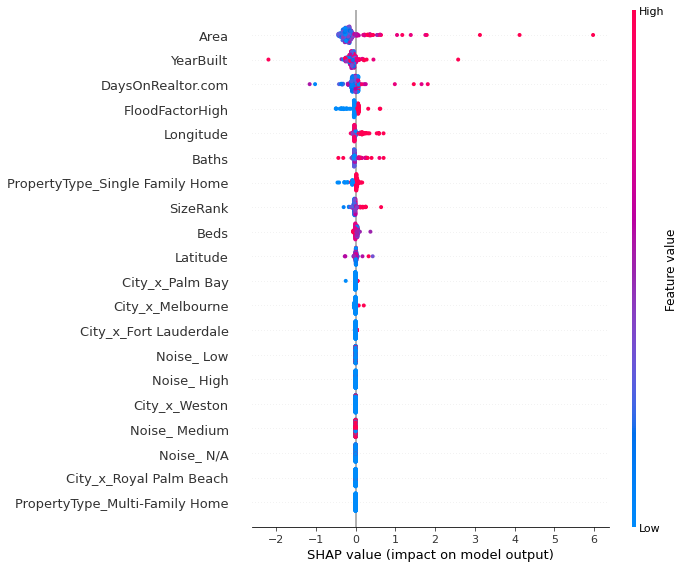

In [150]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_ttest)

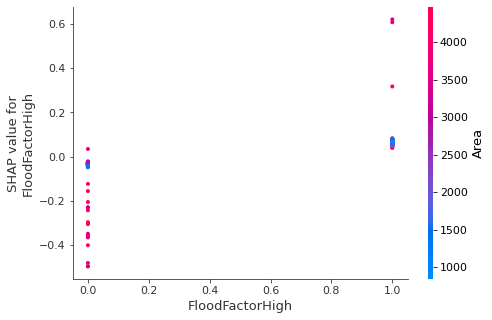

In [152]:
shap.dependence_plot("FloodFactorHigh", shap_values, X_ttest)

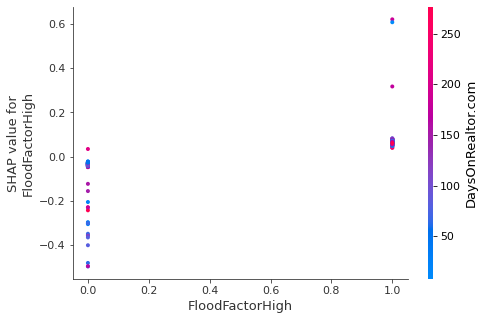

In [153]:
shap.dependence_plot("FloodFactorHigh", shap_values, X_ttest, 
                     interaction_index="DaysOnRealtor.com"
                    )

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted house price as `DaysOnRealtor.com` changes. Vertical dispersion at a single value of `DaysOnRealtor.com` represents interaction effects with other features, in this case, `FloodFactorInfo_flood_factor_high`

/usr/local/anaconda3/envs/blogs/lib/python3.7/site-packages/shap/plots/_scatter.py:645: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



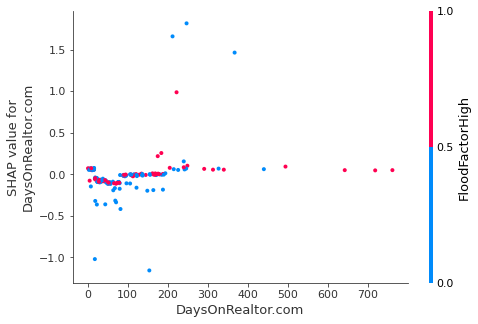

In [154]:
shap.dependence_plot("DaysOnRealtor.com", shap_values, X_ttest, 
                     interaction_index="FloodFactorHigh"
                    )

/usr/local/anaconda3/envs/blogs/lib/python3.7/site-packages/shap/plots/_scatter.py:645: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



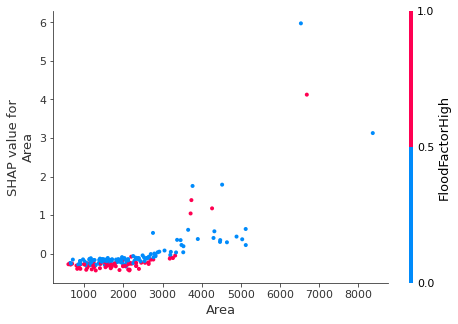

In [155]:
shap.dependence_plot("Area", shap_values, X_ttest, 
                     interaction_index="FloodFactorHigh"
                    )

/usr/local/anaconda3/envs/blogs/lib/python3.7/site-packages/shap/plots/_scatter.py:645: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



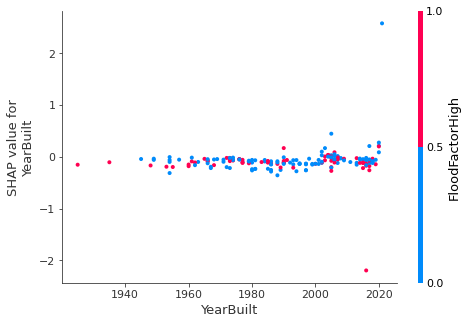

In [157]:
shap.dependence_plot("YearBuilt", shap_values, X_ttest, 
                     interaction_index="FloodFactorHigh"
                    )